In [1]:
import sys
sys.path.append('../src/')

import itertools

%load_ext autoreload
%autoreload 2

from transfer_learning import *

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [60]:
directory = '/cluster/tufts/hugheslab/eharve06/encoded_Dataset_BUSI_with_GT/'
# [normal, benign, malignant]
columns = ['n', 'random_state', 'train_BA', 'train_auroc', 'val_BA', 'val_auroc', 'test_BA', 'test_auroc']
df = pd.DataFrame(columns=columns)
ns = [200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600]
random_states = [1001, 2001, 3001]
for model_index, (n, random_state) in enumerate(itertools.product(ns, random_states)):
    train_BA, train_auroc, val_BA, val_auroc, test_BA, test_auroc = train_and_tune(directory, n, random_state)
    row = [n, random_state, train_BA, train_auroc, val_BA, val_auroc, test_BA, test_auroc]
    df.loc[model_index] = row
    print(df.loc[model_index])
df.to_csv('/cluster/home/eharve06/extrapolating-classifier-accuracy-to-bigger-datasets/experiments/Dataset_BUSI_with_GT_short_range.csv')
df.head()

1.0
n                                                             200
random_state                                                 1001
train_BA                                          [1.0, 1.0, 1.0]
train_auroc                                       [1.0, 1.0, 1.0]
val_BA          [0.8464373464373465, 0.7689520624303232, 0.823...
val_auroc       [0.871007371007371, 0.8121516164994426, 0.8753...
test_BA         [0.8448275862068966, 0.7394894894894894, 0.837...
test_auroc      [0.9436781609195402, 0.8145645645645645, 0.890...
Name: 0, dtype: object
10000.0
n                                                             200
random_state                                                 2001
train_BA                                          [1.0, 1.0, 1.0]
train_auroc                                       [1.0, 1.0, 1.0]
val_BA          [0.884742951907131, 0.7569444444444444, 0.8921...
val_auroc       [0.9270315091210614, 0.7938888888888889, 0.927...
test_BA         [0.8550420168067226, 0.71

1.0
n                                                             400
random_state                                                 1001
train_BA                           [1.0, 0.9978991596638656, 1.0]
train_auroc                        [1.0, 0.9999740636995539, 1.0]
val_BA          [0.8937346437346437, 0.7522296544035675, 0.876...
val_auroc       [0.9299754299754299, 0.8076923076923077, 0.908...
test_BA         [0.9051724137931034, 0.7661411411411412, 0.918...
test_auroc      [0.9781609195402299, 0.8716216216216216, 0.961...
Name: 15, dtype: object
1.0
n                                                             400
random_state                                                 2001
train_BA            [1.0, 0.9955357142857143, 0.9982517482517482]
train_auroc          [1.0, 0.9998604910714285, 0.999953993375046]
val_BA          [0.9552238805970149, 0.8972222222222221, 0.915...
val_auroc       [0.9776119402985074, 0.9055555555555554, 0.963...
test_BA         [0.8771008403361344, 0.77489

1.0
n                                                             600
random_state                                                 1001
train_BA            [0.9989939637826961, 0.9786162380460801, 1.0]
train_auroc         [0.9999804653161688, 0.9935678551576272, 1.0]
val_BA          [0.9004914004914004, 0.8322185061315496, 0.911...
val_auroc       [0.92997542997543, 0.8701226309921962, 0.94862...
test_BA         [0.8718390804597701, 0.7942942942942943, 0.872...
test_auroc      [0.9563218390804598, 0.8978978978978979, 0.945...
Name: 30, dtype: object
0.1
n                                                             600
random_state                                                 2001
train_BA        [0.9921681141439206, 0.9676470588235294, 0.983...
train_auroc     [0.9990307071960298, 0.9917590497737556, 0.998...
val_BA            [0.9402985074626866, 0.875, 0.9545454545454546]
val_auroc       [0.9759535655058043, 0.9144444444444444, 0.961...
test_BA         [0.8623949579831933, 0.79653

,n,random_state,train_BA,train_auroc,val_BA,val_auroc,test_BA,test_auroc
0,200,1001,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[0.8464373464373465, 0.7689520624303232, 0.823...","[0.871007371007371, 0.8121516164994426, 0.8753...","[0.8448275862068966, 0.7394894894894894, 0.837...","[0.9436781609195402, 0.8145645645645645, 0.890..."
1,200,2001,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[0.884742951907131, 0.7569444444444444, 0.8921...","[0.9270315091210614, 0.7938888888888889, 0.927...","[0.8550420168067226, 0.7164502164502164, 0.737...","[0.8487394957983193, 0.8477633477633477, 0.874..."
2,200,3001,"[1.0, 0.9912280701754386, 1.0]","[1.0, 0.9987760097919216, 1.0]","[0.9144869215291751, 0.7814285714285714, 0.898...","[0.9305835010060363, 0.82, 0.9568452380952381]","[0.7431506849315068, 0.6564625850340136, 0.840...","[0.9490106544901065, 0.8396501457725948, 0.932..."
3,240,1001,"[0.9855072463768115, 0.9912561935295832, 0.967...","[0.9980969111403893, 0.9996356747303993, 0.993...","[0.85995085995086, 0.7697881828316611, 0.84962...","[0.8648648648648649, 0.8082497212931996, 0.885...","[0.9137931034482758, 0.7098348348348349, 0.762...","[0.9540229885057472, 0.8513513513513513, 0.892..."
4,240,2001,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[0.9274461028192371, 0.7986111111111112, 0.906...","[0.949419568822554, 0.8211111111111111, 0.9559...","[0.8771008403361344, 0.7683982683982684, 0.738...","[0.8550420168067226, 0.847041847041847, 0.8799..."


In [3]:
df = pd.read_csv('/cluster/home/eharve06/neural-scaling-laws/notebooks/Dataset_BUSI_with_GT.csv', index_col='Unnamed: 0')
df.train_BA = df.train_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.train_auroc = df.train_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.val_BA = df.val_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.val_auroc = df.val_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.test_BA = df.test_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.test_auroc = df.test_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.head()

,n,random_state,train_BA,train_auroc,val_BA,val_auroc,test_BA,test_auroc
0,200,1001,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[0.84643735, 0.76895206, 0.82362155]","[0.87100737, 0.81215162, 0.87531328]","[0.84482759, 0.73948949, 0.83734403]","[0.94367816, 0.81456456, 0.89037433]"
1,200,2001,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[0.88474295, 0.75694444, 0.89213564]","[0.92703151, 0.79388889, 0.92712843]","[0.85504202, 0.71645022, 0.73744113]","[0.8487395, 0.84776335, 0.8744113]"
2,200,3001,"[1.0, 0.99122807, 1.0]","[1.0, 0.99877601, 1.0]","[0.91448692, 0.78142857, 0.8984375]","[0.9305835, 0.82, 0.95684524]","[0.74315068, 0.65646259, 0.84048507]","[0.94901065, 0.83965015, 0.93283582]"
3,240,1001,"[0.98550725, 0.99125619, 0.96721311]","[0.99809691, 0.99963567, 0.99322282]","[0.85995086, 0.76978818, 0.84962406]","[0.86486486, 0.80824972, 0.88533835]","[0.9137931, 0.70983483, 0.76247772]","[0.95402299, 0.85135135, 0.89215686]"
4,240,2001,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[0.9274461, 0.79861111, 0.90692641]","[0.94941957, 0.82111111, 0.95598846]","[0.87710084, 0.76839827, 0.73861852]","[0.85504202, 0.84704185, 0.87990581]"


NameError: name 'df' is not defined

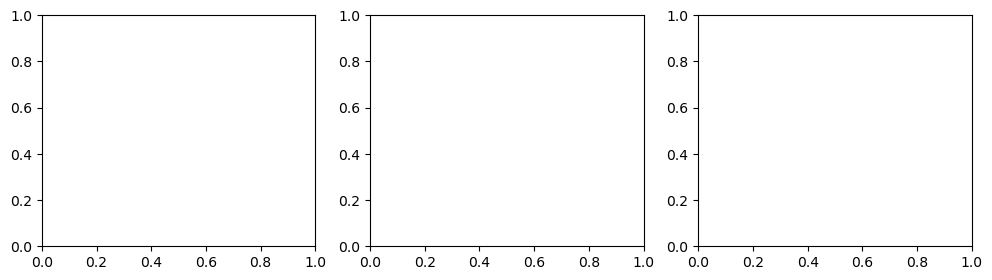

In [2]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12, 3))
labels = ['Normal', 'Benign', 'Malignant']
alphas = [1,1,1,1,1,0.3,0.3,0.3,0.3,0.3,0.3]
for index in range(3):
    axs[index].scatter(df.n[df.random_state==1001].to_numpy(), \
                       np.array(df.val_auroc[df.random_state==1001].to_list())[:,index], label='seed 1001', alpha=alphas)
    axs[index].scatter(df.n[df.random_state==2001].to_numpy(), \
                       np.array(df.val_auroc[df.random_state==2001].to_list())[:,index], label='seed 2001', alpha=alphas)
    axs[index].scatter(df.n[df.random_state==3001].to_numpy(), \
                       np.array(df.val_auroc[df.random_state==3001].to_list())[:,index], label='seed 3001', alpha=alphas)
    axs[index].set_xlim([200, 600])
    axs[index].set_ylim([0.5, 1.0])
    axs[index].set_xscale('log')
    axs[index].set_xlabel('Number of training samples')
    axs[index].set_ylabel('{} AUROC'.format(labels[index]))
    axs[index].legend(loc='lower right')
fig.tight_layout()
plt.show()

In [ ]:
directory = '/cluster/tufts/hugheslab/eharve06/encoded_chest_xray/'
# [normal, pneumonia]
columns = ['n', 'random_state', 'train_BA', 'train_auroc', 'val_BA', 'val_auroc', 'test_BA', 'test_auroc']
df = pd.DataFrame(columns=columns)
ns = [200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600]
ns = [200, 240, 280, 320, 360, 800, 1600, 3200]
random_states = [1001, 2001, 3001]
for model_index, (n, random_state) in enumerate(itertools.product(ns, random_states)):
    train_BA, train_auroc, val_BA, val_auroc, test_BA, test_auroc = train_and_tune(directory, n, random_state)
    row = [n, random_state, train_BA, train_auroc, val_BA, val_auroc, test_BA, test_auroc]
    df.loc[model_index] = row
    print(df.loc[model_index])
df.to_csv('/cluster/home/eharve06/extrapolating-classifier-accuracy-to-bigger-datasets/experiments/chest_xray_long_range.csv')
df.head()

0.1
n                                                             200
random_state                                                 1001
train_BA             [1.0, 0.9690016103059582, 0.965034965034965]
train_auroc         [1.0, 0.9944645732689211, 0.9934977303398357]
val_BA          [0.9113275172260502, 0.808524053079407, 0.7541...
val_auroc       [0.972507779506557, 0.8667829448228723, 0.8022...
test_BA         [0.9026673293571902, 0.800767414403778, 0.7446...
test_auroc      [0.9698120799015431, 0.8750134163357304, 0.798...
Name: 0, dtype: object
0.1
n                                                             200
random_state                                                 2001
train_BA        [0.9851851851851852, 0.931159420289855, 0.8592...
train_auroc     [0.9992022792022791, 0.9762479871175522, 0.926...
val_BA          [0.93426928072237, 0.8071168053867015, 0.76757...
val_auroc       [0.9837343063887686, 0.8809605453204069, 0.817...
test_BA         [0.9109555107837632, 0.777222

0.01
n                                                             800
random_state                                                 1001
train_BA        [0.960361830266094, 0.83555291469388, 0.820895...
train_auroc     [0.9925058585470803, 0.9154106854293602, 0.896...
val_BA          [0.9251361413647478, 0.8223006576001131, 0.740...
val_auroc       [0.9783285174483218, 0.8883494001461334, 0.822...
test_BA         [0.906637555618669, 0.8118850846123573, 0.7397...
test_auroc      [0.9716226450818897, 0.898223677149297, 0.8327...
Name: 15, dtype: object
0.1
n                                                             800
random_state                                                 2001
train_BA        [0.9897335423197492, 0.9168133249528598, 0.916...
train_auroc     [0.9985736677115987, 0.9733752357008171, 0.970...
val_BA          [0.9536211268476715, 0.8502706859108243, 0.792...
val_auroc       [0.9923310037726514, 0.9058470234940823, 0.846...
test_BA         [0.9481784853188889, 0.7827

In [6]:
df = pd.read_csv('/cluster/home/eharve06/extrapolating-classifier-accuracy-to-bigger-datasets/experiments/chest_xray_long_range.csv', index_col='Unnamed: 0')
df.train_BA = df.train_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.train_auroc = df.train_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.val_BA = df.val_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.val_auroc = df.val_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.test_BA = df.test_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.test_auroc = df.test_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.head()

,n,random_state,train_BA,train_auroc,val_BA,val_auroc,test_BA,test_auroc
0,200,1001,"[1.0, 0.96900161, 0.96503497]","[1.0, 0.99446457, 0.99349773]","[0.91132752, 0.80852405, 0.75411353]","[0.97250778, 0.86678294, 0.80226561]","[0.90266733, 0.80076741, 0.74460586]","[0.96981208, 0.87501342, 0.79850686]"
1,200,2001,"[0.98518519, 0.93115942, 0.85920604]","[0.99920228, 0.97624799, 0.9265294]","[0.93426928, 0.80711681, 0.76757612]","[0.98373431, 0.88096055, 0.81799521]","[0.91095551, 0.77722222, 0.71321752]","[0.97729299, 0.85448029, 0.80750637]"
2,200,3001,"[0.96852061, 0.90418048, 0.92066472]","[0.9904009, 0.94472917, 0.96759839]","[0.89192288, 0.7501212, 0.7088743]","[0.96247636, 0.82429703, 0.75185872]","[0.90130996, 0.80558018, 0.73271138]","[0.97729045, 0.88510039, 0.80518111]"
3,240,1001,"[0.95901639, 0.85639751, 0.86302521]","[0.99294807, 0.93157784, 0.92302521]","[0.90370082, 0.81164706, 0.74609214]","[0.9693543, 0.86704221, 0.79519349]","[0.90072659, 0.79909484, 0.74301184]","[0.96643946, 0.87733891, 0.81237557]"
4,240,2001,"[0.95407951, 0.84195804, 0.85134376]","[0.98949912, 0.92293706, 0.91459875]","[0.92896283, 0.81968474, 0.74630802]","[0.98038221, 0.88364143, 0.80490934]","[0.89573769, 0.79967742, 0.70381442]","[0.97436998, 0.87540024, 0.80080253]"


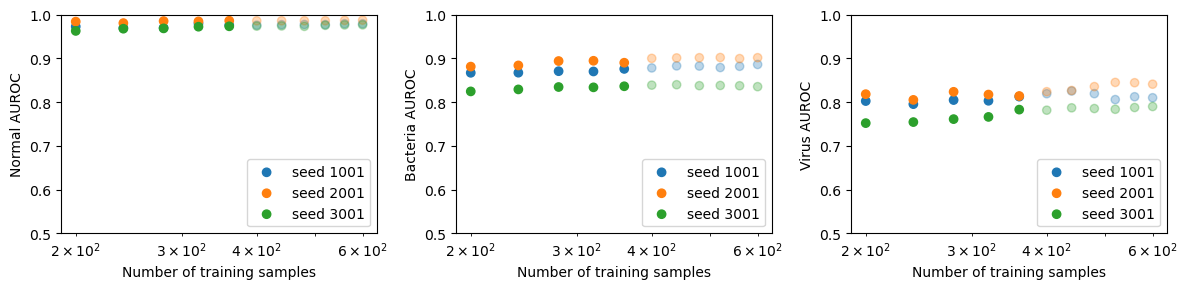

In [7]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12, 3))
labels = ['Normal', 'Bacteria', 'Virus']
alphas = [1,1,1,1,1,0.3,0.3,0.3,0.3,0.3,0.3]
for index in range(3):
    axs[index].scatter(df.n[df.random_state==1001].to_numpy(), \
                       np.array(df.val_auroc[df.random_state==1001].to_list())[:,index], label='seed 1001', alpha=alphas)
    axs[index].scatter(df.n[df.random_state==2001].to_numpy(), \
                       np.array(df.val_auroc[df.random_state==2001].to_list())[:,index], label='seed 2001', alpha=alphas)
    axs[index].scatter(df.n[df.random_state==3001].to_numpy(), \
                       np.array(df.val_auroc[df.random_state==3001].to_list())[:,index], label='seed 3001', alpha=alphas)
    axs[index].set_ylim([0.5, 1.0])
    axs[index].set_xscale('log')
    axs[index].set_xlabel('Number of training samples')
    axs[index].set_ylabel('{} AUROC'.format(labels[index]))
    axs[index].legend(loc='lower right')
fig.tight_layout()
plt.show()